<a href="https://colab.research.google.com/github/MaidinuerSaimi/Python-courses/blob/main/%E2%80%9CWorkshop_3_1_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 3.1 (Wrap-up quiz M7)

Open the dataset `bike_rides.csv` with the following commands:

In [ ]:
import pandas as pd

cycling = pd.read_csv("https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main//datasets/bike_rides.csv", index_col=0,
                      parse_dates=True)
cycling.index.name = ""
target_name = "power"
data, target = cycling.drop(columns=target_name), cycling[target_name]
data

,heart-rate,cadence,speed,acceleration,slope
,,,,,
2020-08-18 14:43:19,102.0,64.0,4.325,0.0880,-0.033870
2020-08-18 14:43:20,103.0,64.0,4.336,0.0842,-0.033571
2020-08-18 14:43:21,105.0,66.0,4.409,0.0234,-0.033223
2020-08-18 14:43:22,106.0,66.0,4.445,0.0016,-0.032908
2020-08-18 14:43:23,106.0,67.0,4.441,0.1144,0.000000
...,...,...,...,...,...
2020-09-13 14:55:57,130.0,0.0,1.054,0.0234,0.000000
2020-09-13 14:55:58,130.0,0.0,0.829,0.0258,0.000000
2020-09-13 14:55:59,129.0,0.0,0.616,-0.1686,0.000000


In [ ]:
import numpy as np

# Take the original cols
speed = data["speed"]              # V_d
slope = data["slope"]              # slope (tan α)
acceleration = data["acceleration"]  # a

# 2. calculate α = arctan(slope)
alpha = np.arctan(slope)

# 3. Only retain positive acceleration (set negative acceleration to 0).
acc_pos = acceleration.clip(lower=0)

# 4.build data_linear_model
data_linear_model = pd.DataFrame(
    {
        "v_cubed": speed ** 3,                  # V_d^3
        "v": speed,                             # V_d
        "sin_alpha_v": np.sin(alpha) * speed,   # sin(α) * V_d
        "a_pos_v": acc_pos * speed,             # a^+ * V_d
    },
    index=data.index,
)

data_linear_model.head()


,v_cubed,v,sin_alpha_v,a_pos_v
,,,,
2020-08-18 14:43:19,80.901828,4.325,-0.146402,0.380600
2020-08-18 14:43:20,81.520685,4.336,-0.145482,0.365091
2020-08-18 14:43:21,85.707790,4.409,-0.146398,0.103171
2020-08-18 14:43:22,87.824421,4.445,-0.146198,0.007112
2020-08-18 14:43:23,87.587538,4.441,0.000000,0.508050


A detailed description of this dataset is given [here](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_bike_rides.html).  Please familiarize yourself with the data.

The problem we are trying to solve with this dataset is to use measurements from
cheap sensors (GPS, heart-rate monitor, etc.) in order to predict a cyclist
power. Power can indeed be recorded via a cycling power meter device, but this
device is rather expensive.

Instead of blindly using  machine learning, we will first introduce some
classic mechanics: the Newton's second law.

$P_{meca} = (\frac{1}{2} \rho . SC_x . V_{a}^{2} + C_r . mg . \cos \alpha + mg . \sin \alpha + ma) V_d$

where $\rho$ is the air density in kg.m$^{-3}$, $S$ is frontal surface of the
cyclist in m$^{2}$, $C_x$ is the drag coefficient, $V_a$ is the air speed in
m.s$^{-1}$, $C_r$ is the rolling coefficient, $m$ is the mass of the rider and
bicycle in kg, $g$ is the standard acceleration due to gravity which is equal
to 9.81 m.s$^{-2}$, $\alpha$ is the slope in radian, $V_d$ is the rider speed
in m.s$^{-1}$, and $a$ is the rider acceleration in m.s$^{-2}$.

This equation might look a bit complex at first but we can explain with words
what the different terms within the parenthesis are:

- the first term is the power that a cyclist is required to produce to fight
  wind
- the second term is the power that a cyclist is required to produce to fight
  the rolling resistance created by the tires on the floor
- the third term is the power that a cyclist is required to produce to go up a
  hill if the slope is positive. If the slope is negative the cyclist does not
  need to produce any power to go forward
- the fourth and last term is the power that a cyclist requires to change his
  speed (i.e. acceleration).

We can simplify the model above by using the data that we have at hand. It
would look like the following.

$P_{meca} = \beta_{1} V_{d}^{3} + \beta_{2} V_{d} + \beta_{3} \sin(\alpha) V_{d} + \beta_{4} a V_{d}$

This model is closer to what we saw previously: it is a linear model trained on
a non-linear feature transformation. We will build, train and evaluate such a
model as part of this exercise. Thus, you need to:

- create a new data matrix containing the cube of the speed, the speed, the
  speed multiplied by the sine of the angle of the slope, and the speed
  multiplied by the acceleration. To compute the angle of the slope, you need to
  take the arc tangent of the slope (`alpha = np.arctan(slope)`). In addition,
  we can limit ourself to positive acceleration only by clipping to 0 the
  negative acceleration values (they would correspond to some power created by
  the braking that we are not modeling here). Hint: it is possible to replace the negative acceleration values by 0 using
`data["acceleration"].clip(lower=0)`
- using the new data matrix, create a linear predictive model based on a
  [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
  and a
  [`sklearn.linear_model.RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html);
- use a
  [`sklearn.model_selection.ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)
  cross-validation strategy with only 4 splits (`n_splits=4`) to evaluate the
  generalization performance of the model. Use the mean absolute error (MAE) as
  a generalization performance metric. Also, pass the parameter
  `return_estimator=True` and `return_train_score=True` to answer the subsequent
  questions. Be aware that the `ShuffleSplit` strategy is a naive strategy and
  we will investigate the consequence of making this choice in the subsequent
  questions.

<div class="alert alert-info">
    
## Question 1

What is the mean value of the column containing the information of
$\sin(\alpha) V_{d}$?

- a) about -3
- b) about -0.3
- c) about -0.03
- d) about -0.003


In [ ]:
sin_alpha_v_mean = data_linear_model["sin_alpha_v"].mean()
sin_alpha_v_mean
#so the answer is d

np.float64(-0.002709709612566326)

<div class="alert alert-info">
    
## Question 2

On average, the Mean Absolute Error on the test sets obtained through
cross-validation is closest to:

- a) 20 Watts
- b) 50 Watts
- c) 70 Watts
- d) 90 Watts

Hint: pass `scoring="neg_mean_absolute_error"` to the `cross_validate`
function to compute the (negative of) the requested metric.


In [ ]:
### c) 70 Watts
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_validate
model = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("ridge", RidgeCV(alphas=np.logspace(-3, 3, 7)))
    ]
)
cv = ShuffleSplit(
    n_splits=4,
    test_size=0.2,      # 0.2 to 0.25
    random_state=0
)
cv_results = cross_validate(
    model,
    data_linear_model,
    target,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    return_estimator=True,
)

# MES
test_mae = -cv_results["test_score"]
train_mae = -cv_results["train_score"]

print("Test MAE per split:", test_mae)
print("Mean test MAE:", test_mae.mean())
print("Mean train MAE:", train_mae.mean())


Test MAE per split: [73.35460078 72.19611691 73.46131363 71.90419998]
Mean test MAE: 72.72905782469995
Mean train MAE: 72.40393756300224


<div class="alert alert-info">
    
## Question 3

Given the model
$P_{meca} = \beta_{1} V_{d}^{3} + \beta_{2} V_{d} + \beta_{3} \sin(\alpha) V_{d} + \beta_{4} a V_{d}$
that you created, inspect the weights of the linear models fitted during
cross-validation and select the correct statements:

- a) $\beta_{1} < \beta_{2} < \beta_{3}$
- b) $\beta_{3} < \beta_{1} < \beta_{2}$
- c) $\beta_{2} < \beta_{3} < \beta_{1}$
- d) $\beta_{1} < 0$
- e) $\beta_{2} < 0$
- f) $\beta_{3} < 0$
- g) $\beta_{4} < 0$
- h) All $\beta$s are $> 0$



In [ ]:
import numpy as np

feature_names = data_linear_model.columns
feature_names


Index(['v_cubed', 'v', 'sin_alpha_v', 'a_pos_v'], dtype='object')

In [ ]:
coefs = []

for i, est in enumerate(cv_results["estimator"]):
    ridge = est.named_steps["ridge"]
    coef = ridge.coef_
    coefs.append(coef)
    print(f"\nSplit {i}")
    for name, c in zip(feature_names, coef):
        print(f"  {name:12s}: {c:.4f}")

coefs = np.vstack(coefs)
coef_mean = coefs.mean(axis=0)

print("\n=== Mean coefficients across CV splits ===")
for name, c in zip(feature_names, coef_mean):
    print(f"{name:12s}: {c:.4f}")



Split 0
  v_cubed     : 6.0247
  v           : 33.1048
  sin_alpha_v : 80.7767
  a_pos_v     : 10.8962

Split 1
  v_cubed     : 5.5860
  v           : 32.6856
  sin_alpha_v : 80.8559
  a_pos_v     : 11.5921

Split 2
  v_cubed     : 6.4465
  v           : 32.3305
  sin_alpha_v : 81.0914
  a_pos_v     : 10.9469

Split 3
  v_cubed     : 6.7060
  v           : 32.0081
  sin_alpha_v : 80.8445
  a_pos_v     : 11.3546

=== Mean coefficients across CV splits ===
v_cubed     : 6.1908
v           : 32.5323
sin_alpha_v : 80.8921
a_pos_v     : 11.1975


   
Now, we will create a predictive model that uses all `data`, including available
sensor measurements such as cadence (the speed at which a cyclist turns pedals
measured in rotation per minute) and heart-rate (the number of beat per minute
of the heart of the cyclist while exercising). Also, we will use a non-linear
regressor, a
[`sklearn.ensemble.HistGradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html).
Fix the number of maximum iterations to 1000 (`max_iter=1_000`) and activate the
early stopping (`early_stopping=True`). Repeat the previous evaluation using
this regressor.

Be sure to run the model on the original data, without the nonlinear features that were
added for the linear model.

<div class="alert alert-info">
    
## Question 4

On average, the Mean Absolute Error on the test sets obtained through
cross-validation is closest to:

- a) 20 Watts
- b) 40 Watts
- c) 60 Watts
- d) 80 Watts



In [ ]:
###b) 40 Watts is the right answer:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(
    n_splits=4,
    test_size=0.2,
    random_state=0,
)
hgb = HistGradientBoostingRegressor(
    max_iter=1_000,
    early_stopping=True,
    random_state=0,
)

cv_results_hgb = cross_validate(
    hgb,
    data,          # 注意：原始 data
    target,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    return_estimator=True,
)

test_mae_hgb = -cv_results_hgb["test_score"]
train_mae_hgb = -cv_results_hgb["train_score"]

print("Test MAE per split (HGB):", test_mae_hgb)
print("Mean test MAE (HGB):", test_mae_hgb.mean())
print("Mean train MAE (HGB):", train_mae_hgb.mean())
test_mae_hgb.mean()


Test MAE per split (HGB): [44.58370314 43.78166534 44.49534139 43.44119263]
Mean test MAE (HGB): 44.07547562516566
Mean train MAE (HGB): 39.98433152270076


np.float64(44.07547562516566)

<div class="alert alert-info">
    
## Question 5

Comparing both the linear model and the histogram gradient boosting model and
taking into consideration the train and test MAE obtained via cross-validation,
select the correct statements:

- a) the generalization performance of the histogram gradient-boosting model is
  limited by its underfitting
- b) the generalization performance of the histogram gradient-boosting model is
  limited by its overfitting
- c) the generalization performance of the linear model is limited by its
  underfitting
- d) the generalization performance of the linear model is limited by its
  overfitting
    
Hint: look at the values of the `train_score` and the `test_score` collected
in the dictionaries returned by the `cross_validate` function.


In [ ]:
#b) the generalization performance of the histogram gradient-boosting model is limited by its overfitting

In the previous cross-validation, we made the choice of using a `ShuffleSplit`
cross-validation strategy. It means that randomly selected samples were selected
as testing set ignoring any time dependency between the lines of the dataframe.

We would like to have a cross-validation strategy that takes into account the
groups defined by each individual date. Each group corresponds to a bike ride.

<div class="alert alert-info">
    
## Question 6

How many bike rides are stored in the dataframe `data`? Do not hesitate to
look at the hints.

- a) 2
- b) 3
- c) 4
- d) 5

Hint: You can check the unique day in the `DatetimeIndex` (the index of the
dataframe `data`). Indeed, we assume that on a given day the rider went cycling
at most once per day.
Hint: You can access to the date and time of a `DatetimeIndex` using
`df.index.date` and `df.index.time`, respectively.

In [ ]:
#4
unique_days = data.index.date
len(np.unique(unique_days))


4

We would like to have a cross-validation strategy that evaluates the capacity of
our model to predict on a completely new bike ride: the samples in the
validation set should only come from rides not present in the training set.
Therefore, we can use a `LeaveOneGroupOut` strategy: at each iteration of the
cross-validation, we will keep a bike ride for the evaluation and use all other
bike rides to train our model.

Thus, you concretely need to:

- create a variable called `group` that is a 1D numpy array containing the
  index of each ride present in the dataframe. Therefore, the length of `group`
  will be equal to the number of samples in `data`. If we had 2 bike
  rides, we would expect the indices 0 and 1 in `group` to differentiate the
  bike ride. You can use
  [`pd.factorize`](https://pandas.pydata.org/docs/reference/api/pandas.factorize.html)
  to encode any Python types into integer indices.
- create a cross-validation object named `cv` using the
  [`sklearn.model_selection.LeaveOneGroupOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneGroupOut.html#sklearn.model_selection.LeaveOneGroupOut)
  strategy.
- evaluate both the linear and histogram gradient boosting models with this
  strategy.

<div class="alert alert-info">
    
## Question 7
                                               
Using the previous evaluations (with the `LeaveOneGroupOut` strategy)
and looking at the train and test errors for both models, select the
correct statements:

- a) the generalization performance of the gradient-boosting model is
  limited by its underfitting
- b) the generalization performance of the gradient-boosting model is
  limited by its overfitting
- c) the generalization performance of the linear model is limited by its
  underfitting
- d) the generalization performance of the linear model is limited by its
  overfitting


In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut, cross_validate

# date accordingly
ride_dates = data.index.date

# label them
groups, unique_dates = pd.factorize(ride_dates)

print("Unique ride dates:", unique_dates)
print("Number of rides:", len(unique_dates))
print("groups shape:", groups.shape)


Unique ride dates: [datetime.date(2020, 8, 18) datetime.date(2020, 8, 20)
 datetime.date(2020, 8, 26) datetime.date(2020, 9, 13)]
Number of rides: 4
groups shape: (38254,)


In [ ]:
#✅ b) the generalization performance of the gradient-boosting model is limited by its overfitting
#✅ c) the generalization performance of the linear model is limited by its underfitting
logo = LeaveOneGroupOut()
cv_results_linear_logo = cross_validate(
    model,
    data_linear_model,      # ⚠️ 4 non linear features we have used
    target,
    cv=logo,
    groups=groups,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
)

linear_train_mae_logo = -cv_results_linear_logo["train_score"]
linear_test_mae_logo = -cv_results_linear_logo["test_score"]

print("Linear - train MAE per ride:", linear_train_mae_logo)
print("Linear - test MAE per ride:", linear_test_mae_logo)
print("Linear - mean train MAE:", linear_train_mae_logo.mean())
print("Linear - mean test MAE:", linear_test_mae_logo.mean())
cv_results_hgb_logo = cross_validate(
    hgb,
    data,                 # ⚠️ HGBR use the original data
    target,
    cv=logo,
    groups=groups,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
)

hgb_train_mae_logo = -cv_results_hgb_logo["train_score"]
hgb_test_mae_logo = -cv_results_hgb_logo["test_score"]

print("HGBR - train MAE per ride:", hgb_train_mae_logo)
print("HGBR - test MAE per ride:", hgb_test_mae_logo)
print("HGBR - mean train MAE:", hgb_train_mae_logo.mean())
print("HGBR - mean test MAE:", hgb_test_mae_logo.mean())


Linear - train MAE per ride: [72.4317474  72.28702403 68.96505889 75.31150408]
Linear - test MAE per ride: [72.44062969 73.32064854 81.30750799 64.99031478]
Linear - mean train MAE: 72.2488335996317
Linear - mean test MAE: 73.01477525167496
HGBR - train MAE per ride: [39.49957639 40.75980377 36.57874345 41.18176443]
HGBR - test MAE per ride: [47.70496008 48.03461081 53.82834906 47.95888698]
HGBR - mean train MAE: 39.5049720088998
HGBR - mean test MAE: 49.38170173577183


<div class="alert alert-info">
    
## Question 8
    
Compare the mean of the cross-validation test errors in the evaluations of the
**linear model** to select the correct statement.

When using the `ShuffleSplit` strategy, the mean test error:

- a) is greater than the `LeaveOneGroupOut` mean test error by more than 3 Watts,
  i.e. `ShuffleSplit` is giving over-pessimistic results
- b) differs from the `LeaveOneGroupOut` mean test error by less than 3 Watts,
  i.e. both cross-validation strategies are equivalent
- c) is lower than the `LeaveOneGroupOut` mean test error by more than 3 Watts,
  i.e. `ShuffleSplit` is giving over-optimistic results


In [ ]:
##c) is lower than the LeaveOneGroupOut mean test error by more than 3 Watts, i.e. ShuffleSplit is giving over-optimistic results
print("ShuffleSplit mean test MAE:", test_mae.mean())
print("LOGO mean test MAE:", linear_test_mae_logo.mean())
print("LOGO - ShuffleSplit (W):", linear_test_mae_logo.mean() - test_mae.mean())


ShuffleSplit mean test MAE: 72.72905782469995
LOGO mean test MAE: 73.01477525167496
LOGO - ShuffleSplit (W): 0.2857174269750118


<div class="alert alert-info">
    
## Question 9

Compare the mean of the cross-validation test errors in the evaluations of the
**gradient-boosting model** to select the correct statement.

When using the `ShuffleSplit` strategy, the mean test error:

- a) is greater than the `LeaveOneGroupOut` mean test error by more than 3 Watts,
  i.e. `ShuffleSplit` is giving over-pessimistic results
- b) differs from the `LeaveOneGroupOut` mean test error by less than 3 Watts,
  i.e. both cross-validation strategies are equivalent
- c) is lower than the `LeaveOneGroupOut` mean test error by more than 3 Watts,
  i.e. `ShuffleSplit` is giving over-optimistic results


In [ ]:
#c) is lower than the LeaveOneGroupOut mean test error by more than 3 Watts, i.e. ShuffleSplit is giving over-optimistic results
print(hgb_test_mae_logo.mean() - test_mae_hgb.mean())


5.306226110606168


Now, we will go more into details by picking a single ride for the testing and
analyse the predictions of the models for this test ride. To do so, we can reuse
the `LeaveOneGroupOut` cross-validation object in the following manner:

In [ ]:
cv = LeaveOneGroupOut()
train_indices, test_indices = list(cv.split(data, target, groups=groups))[0]

data_linear_model_train = data_lin.iloc[train_indices]
data_linear_model_test = data_lin.iloc[test_indices]

data_train = data.iloc[train_indices]
data_test = data.iloc[test_indices]

target_train = target.iloc[train_indices]
target_test = target.iloc[test_indices]

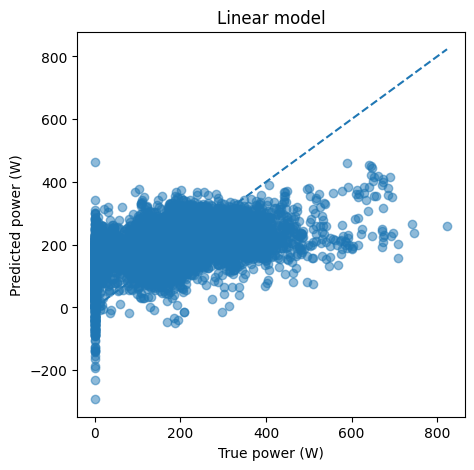

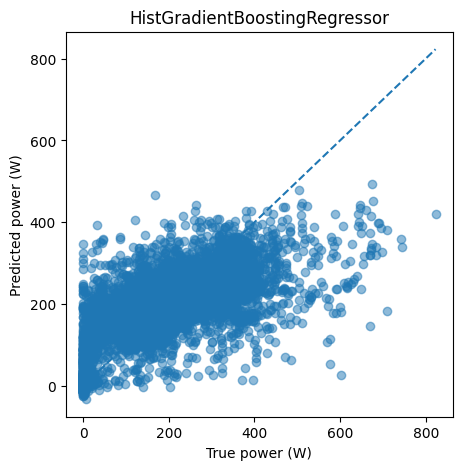

In [15]:
cv = LeaveOneGroupOut()
train_indices, test_indices = list(cv.split(data, target, groups=groups))[0]

# 注意：这里题目中用的是 data_lin，我假设你之前把 data_linear_model 命名成了 data_lin
data_linear_model_train = data_linear_model.iloc[train_indices]
data_linear_model_test = data_linear_model.iloc[test_indices]

data_train = data.iloc[train_indices]
data_test = data.iloc[test_indices]

target_train = target.iloc[train_indices]
target_test = target.iloc[test_indices]

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingRegressor

# 线性模型：用力学特征
linear_model = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("ridge", RidgeCV(alphas=np.logspace(-3, 3, 7)))
    ]
)

# HGBR：用所有原始特征
hgb_model = HistGradientBoostingRegressor(
    max_iter=1_000,
    early_stopping=True,
    random_state=0,
)
# 线性模型：用 data_linear_model_* 训练和预测
linear_model.fit(data_linear_model_train, target_train)
y_pred_linear = linear_model.predict(data_linear_model_test)

# HGBR：用原始 data_* 训练和预测
hgb_model.fit(data_train, target_train)
y_pred_hgb = hgb_model.predict(data_test)
import matplotlib.pyplot as plt

# 线性模型
plt.figure(figsize=(5, 5))
plt.scatter(target_test, y_pred_linear, alpha=0.5)
plt.plot(
    [target_test.min(), target_test.max()],
    [target_test.min(), target_test.max()],
    linestyle="--"
)
plt.xlabel("True power (W)")
plt.ylabel("Predicted power (W)")
plt.title("Linear model")

plt.show()

# HGBR 模型
plt.figure(figsize=(5, 5))
plt.scatter(target_test, y_pred_hgb, alpha=0.5)
plt.plot(
    [target_test.min(), target_test.max()],
    [target_test.min(), target_test.max()],
    linestyle="--"
)
plt.xlabel("True power (W)")
plt.ylabel("Predicted power (W)")
plt.title("HistGradientBoostingRegressor")

plt.show()


Now, fit both the linear model and the histogram gradient boosting regressor
models on the training data and collect the predictions on the testing data.
Make a scatter plot where on the x-axis, you will plot the measured powers (true
target) and on the y-axis, you will plot the predicted powers (predicted
target). Do two separated plots for each model.

<div class="alert alert-info">
    
## Question 10

By analysing the plots, select the correct statements:

- a) the linear regressor tends to under-predict samples with high power
- b) the linear regressor tends to over-predict samples with high power
- c) the linear regressor makes catastrophic predictions for samples with power
  close to zero
- d) the histogram gradient boosting regressor tends to under-predict samples
  with high power
- e) the histogram gradient boosting regressor tends to over-predict samples
  with high power
- f) the histogram gradient boosting makes catastrophic predictions for samples
  with power close to zero



In [ ]:
#a) the linear regressor tends to under-predict samples with high power

#f) the histogram gradient boosting makes catastrophic predictions for samples with power close to zero